<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [32]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [33]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [34]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [35]:
boston_df=pd.read_csv(boston_url)


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [36]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


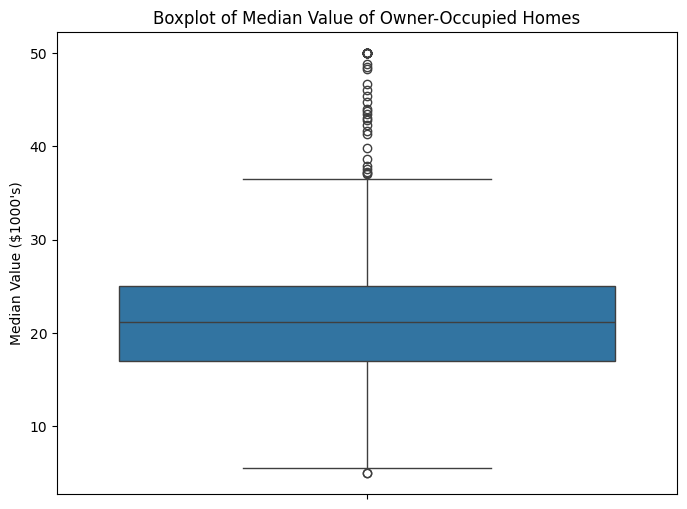

In [37]:
# Create a figure with a customized size
plt.figure(figsize=(8, 6))

# Using Seaborn to draw a boxplot for the 'MEDV' column from boston_df
sns.boxplot(data=boston_df, y='MEDV')

# Adding titles and labels
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("Median Value ($1000's)")

# Display the plot
plt.show()

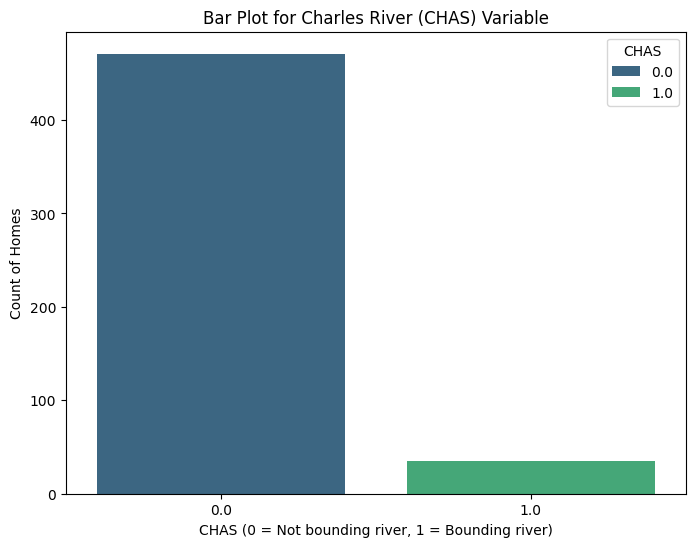

In [38]:
chas_counts = boston_df['CHAS'].value_counts().sort_index()  # Sort so that 0 comes before 1

plt.figure(figsize=(8, 6))

sns.barplot(x=chas_counts.index, y=chas_counts.values, palette="viridis", hue=chas_counts.index,legend=True)

plt.title("Bar Plot for Charles River (CHAS) Variable")
plt.xlabel("CHAS (0 = Not bounding river, 1 = Bounding river)")
plt.ylabel("Count of Homes")

plt.show()

<ipython-input-39-4639d8022c7a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeGroup', y='MEDV', data=boston_df, palette="Set3")


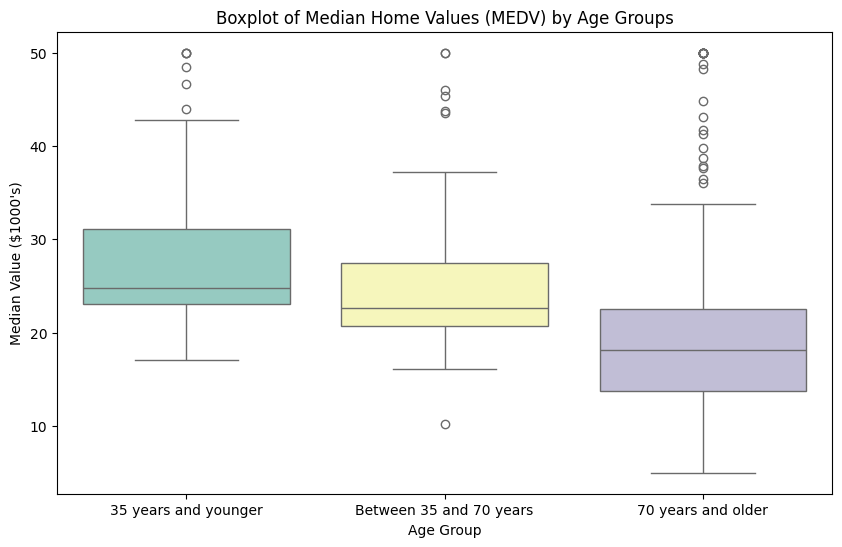

In [39]:
import numpy as np
# Define bin edges and group labels.
# We use np.inf to ensure we capture all values greater than 70.
bins = [0, 35, 70, np.inf]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']

# Create a new column 'AgeGroup' based on the 'AGE' column using pd.cut
boston_df['AgeGroup'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='MEDV', data=boston_df, palette="Set3")
plt.title("Boxplot of Median Home Values (MEDV) by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Median Value ($1000's)")
plt.show()

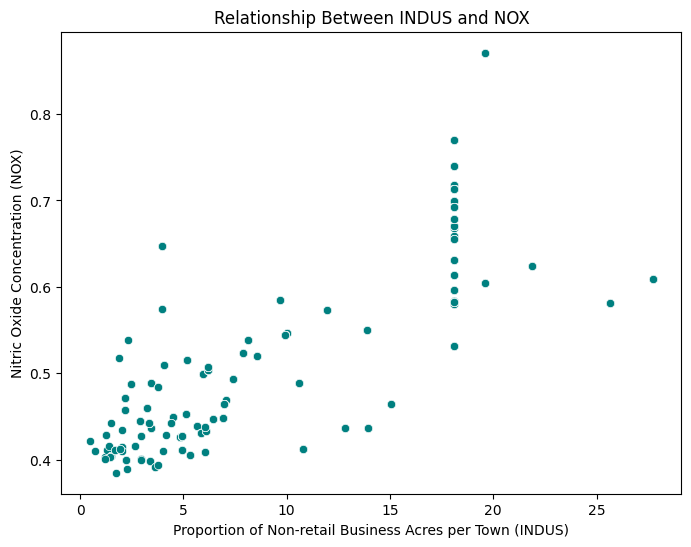

In [40]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=boston_df, x='INDUS', y='NOX', color='teal')

plt.title("Relationship Between INDUS and NOX")
plt.xlabel("Proportion of Non-retail Business Acres per Town (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")

plt.show()

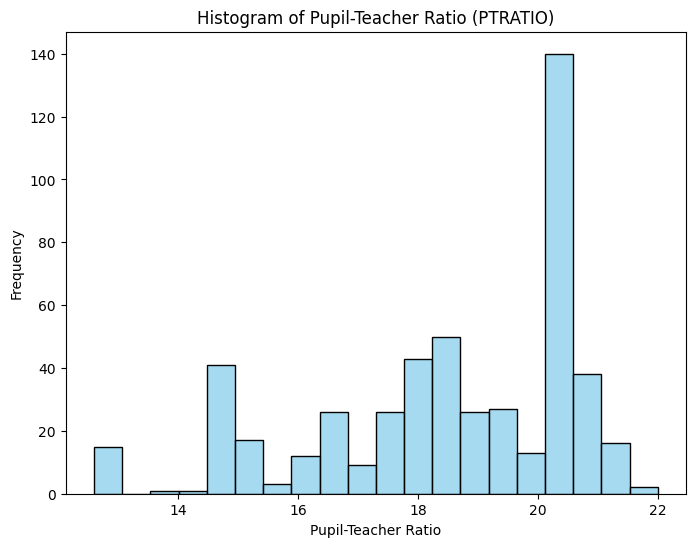

In [41]:
plt.figure(figsize=(8, 6))

sns.histplot(boston_df['PTRATIO'], bins=20, kde=False, color='skyblue')

# Add titles and labels
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")

# Display the plot
plt.show()


### T-Test for House Values by Charles River (CHAS)

<p> Question: Is there a significant difference in the median (or mean) value of houses bounded by the Charles River versus homes that are not?</p>

<p>
    H₀: There is no difference in median home values (MEDV) between houses that border the Charles River (CHAS = 1) and those that do not (CHAS = 0).

</p>

<p>H₁: There is a difference in MEDV between the two groups.
</p>


In [42]:
medv_river = boston_df[boston_df['CHAS']== 1]['MEDV']
medv_non_river = boston_df[boston_df['CHAS']== 0]['MEDV']

In [43]:
t_statistic, p_value = stats.ttest_ind(medv_river, medv_non_river, equal_var=False)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 3.1133
P-value: 0.0036


<p>the p-value < 0.05 which means we reject the null hypothesis (H₀), meaning there is a statistically significant difference between the median home values in areas near the Charles River and those further away.</p>

### ANOVA for Home Values Across AGE Groups

<p> Question :Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)</p>

<p>H₀: The mean (or median) house value is the same across the three AGE groups.</p>
<p>H₁: At least one AGE group has a different mean house value from the others.</p>

In [44]:
boston_df[['AgeGroup']].value_counts()

AgeGroup               
70 years and older         287
Between 35 and 70 years    128
35 years and younger        91
Name: count, dtype: int64

In [45]:
lm = ols('MEDV ~ AgeGroup', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq         F        PR(>F)
AgeGroup    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual  503.0  37314.563532    74.184023       NaN           NaN


<p><b>p-value < 0.05, we reject H₀, meaning that there is a significant difference in median home values across at least one of the age groups.</b></p>

### Pearson Correlation Between NOX and INDUS

<p><b>Question : Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)</b></p>

<p>H₀: There is no linear correlation between NOX and INDUS.</p>
<p>H₁: There is a significant linear correlation between NOX and INDUS .</p>

In [51]:
r, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation Coefficient: {r:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient: 0.7637
P-value: 0.0000


<p> Pearson Correlation Coefficient  is close to 1 indicates a strong positive relationship, meaning as INDUS increases, NOX also tends to increase.</p>
<p>p-value < 0.05, reject H₀ (no correlation) → significant relationship exists between INDUS and NOX.</p>

### Regression Analysis: Effect of DIS on MEDV

<p><b>Question: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</b></p>

<p>H₀: The regression coefficient for DIS is zero (i.e., DIS has no effect on MEDV).
</p>
<p>H₁: The regression coefficient for DIS is not zero (i.e., DIS affects MEDV).</p>

In [54]:
# Define independent variable (DIS) and dependent variable (MEDV)
X = boston_df['DIS']
y = boston_df['MEDV']

# Add an intercept (constant term)
X = sm.add_constant(X) 

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        19:34:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p><b>homes farther from Boston employment centers seem to have slightly higher values</b></p>

<p>The coefficient suggests that as distance from employment centers increases, home values tend to increase as well.</p>
<p>The coefficient (+1.0916) indicates that each unit increase in distance adds approximately $1,091 to the home value.</p>
<p>The p-value is 0.000, meaning the effect is statistically significant</p>
